Мета завдання:
Розробити інтелектуальний модуль, що використовує нечітку логіку для 
виявлення схожих записів у базі даних, навіть якщо терміни мають різні 
варіації написання, скорочення, орфографічні помилки або альтернативні 
форми. Завдання спрямоване на формування практичних навичок роботи з 
нечіткими множинами, функціями належності та нечітким виведенням для 
класифікації і групування схожих записів.

In [1]:
import pandas as pd
import numpy as np
from rapidfuzz import fuzz
import fuzzy
import matplotlib.pyplot as plt
from tabulate import tabulate
from Levenshtein import distance as levenshtein_distance

In [1]:
ds = pd.read_csv('../data/room_type.csv')
ds.head()

NameError: name 'pd' is not defined

In [3]:
ds.count()

Expedia        103
Booking.com    103
dtype: int64

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Expedia      103 non-null    object
 1   Booking.com  103 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


те шо я побачив на кеґлі - там попарно порівнюють оці записи. хотя воно не сильно "пошук по бд", але на безвір'ї і Тома вірянин😇

In [5]:
class IntelektualnyiModul:
  def __init__(self, soundex: int = 4, threshold: float = 0.75):
    self.soundex = fuzzy.Soundex(soundex)
    self.weights = [
      (self.token_sort_ratio, 0.5),
      (self.soundex_similarity, 0.5),
      (self.damerau_levenshtein_distance, 0.0)
    ]
    
    self.threshold = threshold
    self.decisions = [
      "Yess🎀", "Nooo🚬",
    ]
  
  def soundex_similarity(self, str1, str2) -> int:
    return int(self.soundex(str1) == self.soundex(str2)) * 100
  
  def similarity_weighted(self, str1, str2, jw_: float = None, soundex_: int = None, levenshtein_: int = None) -> float:
    if jw_ is None:
      jw_ = self.token_sort_ratio(str1, str2)
    if soundex_ is None:
      soundex_ = self.soundex_similarity(str1, str2)
    if levenshtein_ is None:
      levenshtein_ = self.damerau_levenshtein_distance(str1, str2)
    
    similarity = (
      jw_ * 0.5 + 
      soundex_ * 0.5 + 
      levenshtein_ * 0.0
    )
    return round(similarity, 2)
  def similarity_weighted_V2(self, str1, str2, weights: list = None) -> float:
    if weights is None:
      weights = self.weights
    similarity = sum([w[0](str1, str2) * w[1] for w in weights])
    return round(similarity, 2) 
  
  def hard_decision(self, similarity, strong: bool = False) -> str:
    result_index = (similarity < self.threshold) if strong else (similarity <= self.threshold)
    return self.decisions[result_index]
  
  @staticmethod
  def damerau_levenshtein_distance(str1, str2) -> int:
    return levenshtein_distance(str1, str2)
  
  @staticmethod
  def token_sort_ratio(str1, str2) -> float:
    return fuzz.token_sort_ratio(str1, str2) / 100

  def compare(self, str1, str2) -> list:
    """
    Returns:
        list: soundex_sim, damerau-levenshtein, 
    """
    return [
      self.soundex_similarity(str1, str2),
      self.damerau_levenshtein_distance(str1, str2),
    ]
  def compare_row(self, row: pd.Series) -> list:
    str1, str2 = row
    return self.compare(str1, str2)
  
modul = IntelektualnyiModul()

In [6]:
print(modul.soundex_similarity("Hello", "Hella"))
print(modul.soundex_similarity("Hello", "Hell no"))

100
0


перша буква ріііізна, йоооой

In [7]:
print(modul.damerau_levenshtein_distance("Hello", "Hello"))
print(modul.damerau_levenshtein_distance("Hello", "Hella"))
print(modul.damerau_levenshtein_distance("Hello", "Helo"))


0
1
1


In [8]:
print(modul.token_sort_ratio("Hello", "Hello"))
print(modul.token_sort_ratio("Hello", "Hellya"))
print(modul.token_sort_ratio("Hello", "Hell no"))

1.0
0.7272727272727273
0.8333333333333335


In [9]:
modul.similarity_weighted(
  "Hello",
  "Hell no",
  # jw_=0.83333,
  # soundex_=0,
)

0.42

In [10]:
similarity = modul.similarity_weighted_V2(
  "Hello",
  "Hell no",
  weights = [
    (modul.token_sort_ratio, 0.5),
    (modul.soundex_similarity, 0.25),
    (modul.damerau_levenshtein_distance, 0.25)
  ]
)
similarity

0.92

In [209]:
modul.threshold = 0.92
modul.hard_decision(
  similarity,
  strong=False
)

'Nooo🚬'

### чіткі рішення є, тепер м'ягеенькі🍦

ооо оце мені подобаєця

окі, я подивився на приклад, і в мене нема стільки полів шоб попарно їх перевіряти, вони в мене по парах і стоять то, тому перевірим пари

In [12]:
ds.shape

(103, 2)

перевірити 103 пари, чи вдать шо їх більше і зробить пошук

пошук по чому?..

запхаєм наші лапи🐾 в датасет

In [13]:
type(ds.iloc[0])

pandas.core.series.Series

In [14]:
str1, str2 = ds.iloc[0]
str1, str2

('Deluxe Room, 1 King Bed', 'Deluxe King Room')

In [15]:
modul.compare(str1, str2)

[0, 12]

In [16]:
modul.compare_row(ds.iloc[0])

[0, 12]

### м'ягкі рішення тут 👇

In [17]:
import math

In [183]:
class MembershipFunctions:
  def __init__(self):
    pass
  
  @staticmethod
  def apply(x_array, function):
    return [function(x) for x in x_array]

  @staticmethod
  def triangular(x, params: list):
    """a, b, c"""
    a, b, c = params
    if x < a:
      return 0
    elif x >= a and x < b:
      return (x - a) / (b - a)
    elif x >= b and x < c:
      return (c - x) / (c - b)
    else:
      return 0 
  
  @staticmethod
  def trapezoidal(x, params: list):
    """a, b, c, d"""
    a, b, c, d = params
    if x < a or x > d:
        return 0
    elif a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)
      
  @staticmethod
  def gaussian(x, params: list):
    """mean, sigma"""
    mean, sigma = params
    return math.exp(-((x - mean) ** 2) / (2 * sigma ** 2))
  
  @staticmethod
  def sigmoidal(x, params: list):
    """a: slope, c: center - Sigmoidal Membership Function"""
    a, c = params
    try:
      return 1 / (1 + math.exp(-a * (x - c)))
    except OverflowError:  # Handle large exponent values
      return 1.0 if a * (x - c) > 0 else 0.0
  
  @staticmethod
  def plot(x, membership, label) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(x, membership, label=label)
    plt.title('Функції належності для ступеня схожості')
    plt.xlabel('Схожість (%)')
    plt.ylabel('Ступінь належності')
    plt.legend()
    plt.grid(True)
    plt.show()
  @staticmethod
  def plot_many(x, mem_labels: list) -> None:
    plt.figure(figsize=(10, 6))
    for membership, label in mem_labels:
      plt.plot(x, membership, label=label)
    plt.title('Функції належності для ступеня схожості')
    plt.xlabel('Схожість (%)')
    plt.ylabel('Ступінь належності')
    plt.legend()
    plt.grid(True)
    plt.show()
membership = MembershipFunctions()

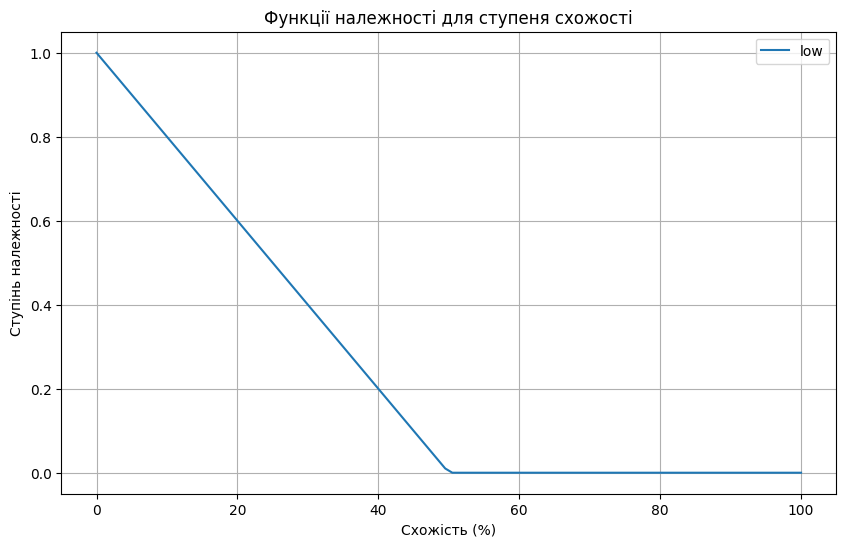

In [172]:
X = np.linspace(0, 100, 100)

low_rules = [0, 0, 50]
low_member = membership.apply(X, lambda x: membership.triangular(x, low_rules))
membership.plot(X, low_member, "low")

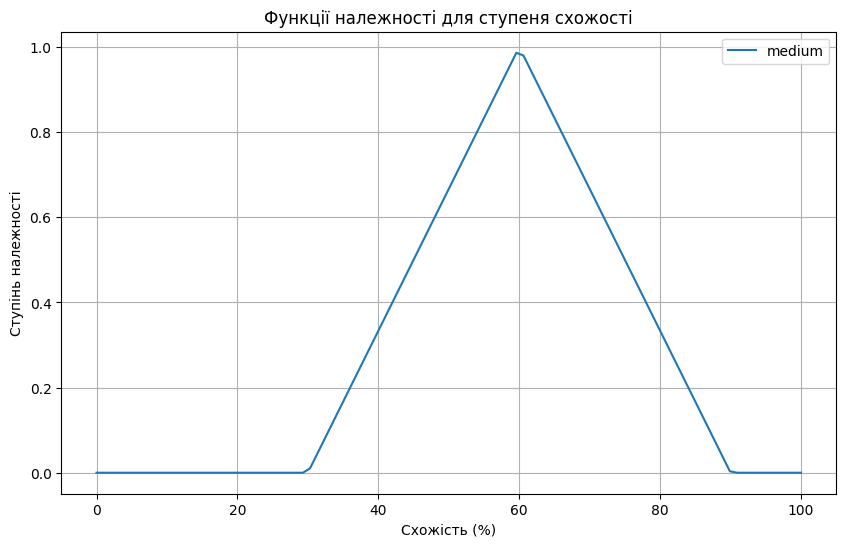

In [173]:
medium_rules = [30, 60, 90]
medium_member = membership.apply(X, lambda x: membership.triangular(x, medium_rules))
membership.plot(X, medium_member, "medium")

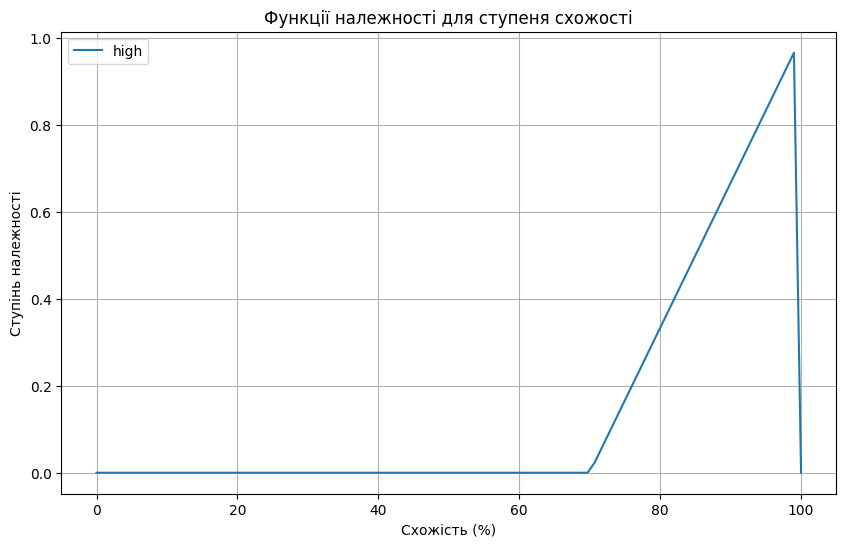

In [174]:
high_rules = [70, 100, 100]
high_member = membership.apply(X, lambda x: membership.triangular(x, high_rules))
membership.plot(X, high_member, "high")

а якшо запихнуть то всьо в окремий клас?

In [184]:
class SoftDecider:
  def __init__(self, name: str, rules: list, membership_function = None, intelektualnyi_modul: IntelektualnyiModul = None):
    self.name = name
    self.rules = rules
    self.mem_func = membership_function if membership_function is not None else MembershipFunctions.triangular
    if intelektualnyi_modul is None:
      self.modul = IntelektualnyiModul(threshold=75) # Я ТУТ ЗАТУПИИИИИИИИВ🤧🤧🤧 
    
  def decide(self, x) -> float:
    """needs x to be [0, 100]"""
    return self.mem_func(x, self.rules)
  
  def decide_strs(self, str1, str2, weights: list = None) -> float:
    if weights is None:
      similarity = self.modul.similarity_weighted_V2(str1, str2)
    else:
      similarity = self.modul.similarity_weighted_V2(str1, str2, weights)
    return self.decide(similarity * 100)
  
  def hard_decide(self, x, strong: bool = False) -> str:
    """needs x to be [0, 100]"""
    return self.modul.hard_decision(x, strong)
  
  def decide_strs_hard(self, str1, str2, strong: bool = False, weights: list = None) -> float:
    if weights is None:
      similarity = self.modul.similarity_weighted_V2(str1, str2)
    else:
      similarity = self.modul.similarity_weighted_V2(str1, str2, weights)
    return self.hard_decide(similarity * 100, strong)
  
  def decide_array(self, X):
    return MembershipFunctions.apply(X, lambda x: self.mem_func(x, self.rules))
    
  def plot_decider(self, X):
    member = self.decide_array(X)
    membership.plot(X, member, self.name)
    
  def plot_many_deciders(X, deciders):
    MembershipFunctions.plot_many(
      X, [(d.decide_array, d.name) for d in deciders]
    )
    return 

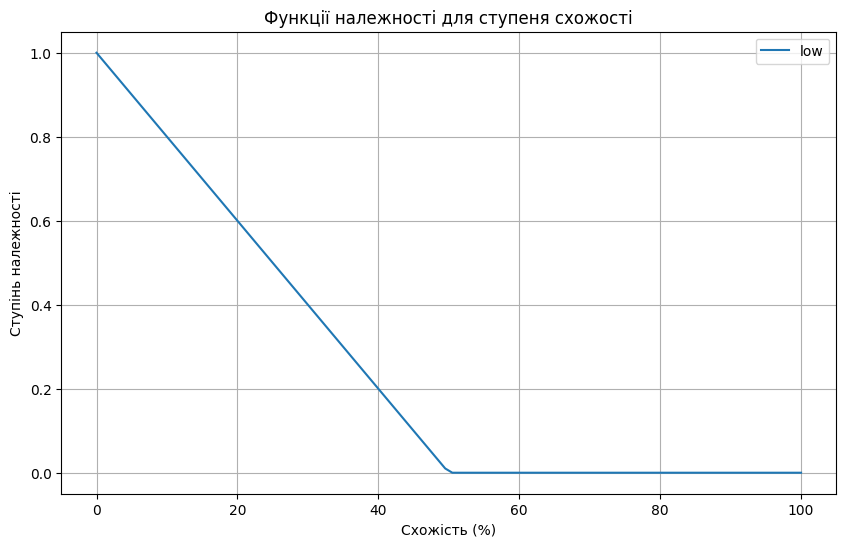

In [177]:
low_decider = SoftDecider(
  "low", [0, 0, 50]
)
low_decider.plot_decider(X)

In [24]:
low_decider.decide(40)

0.2

In [25]:
low_decider.hard_decide(40, strong=True)

'Nooo🚬'

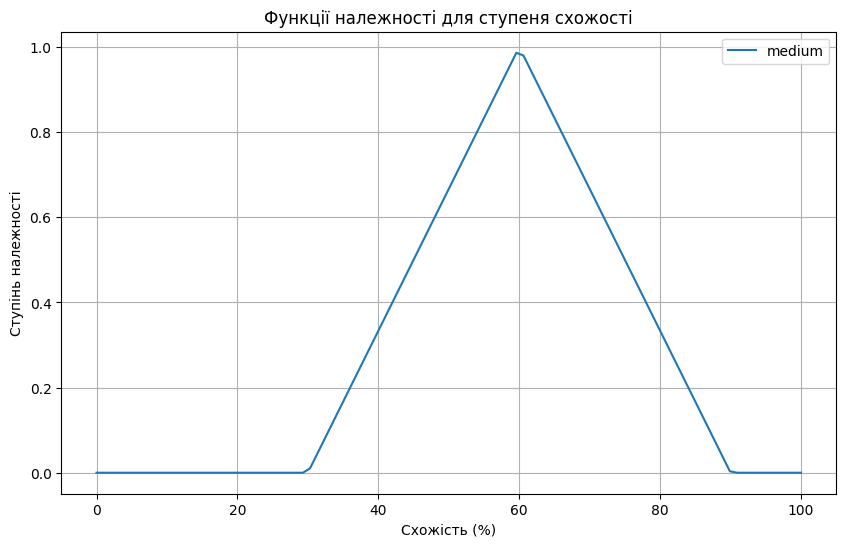

In [26]:
medium_decider = SoftDecider(
  "medium", [30, 60, 90]
)
medium_decider.plot_decider(X)

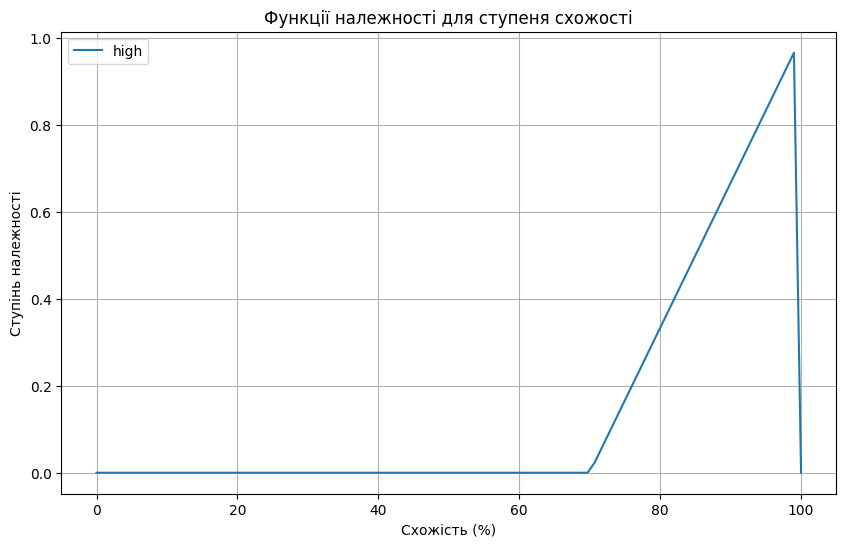

In [27]:
high_decider = SoftDecider(
  "high", [70, 100, 100]
)
high_decider.plot_decider(X)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

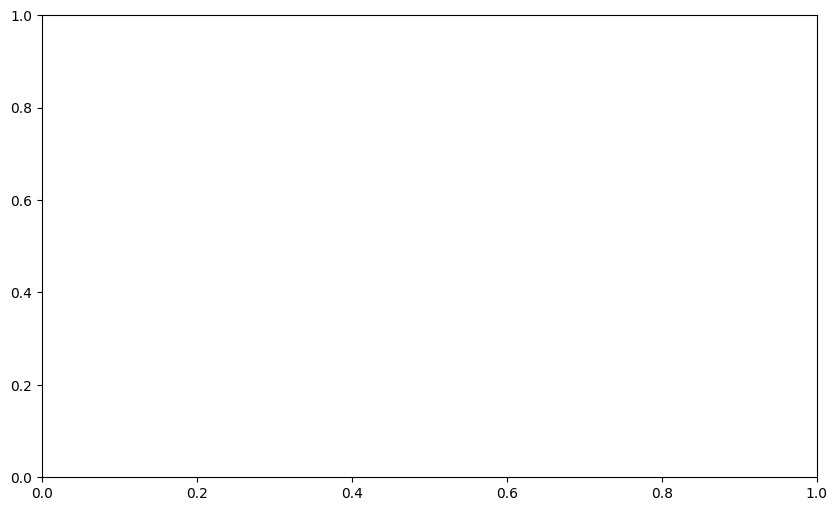

In [28]:
SoftDecider.plot_many_deciders(
  X, [low_decider, medium_decider, high_decider]
)

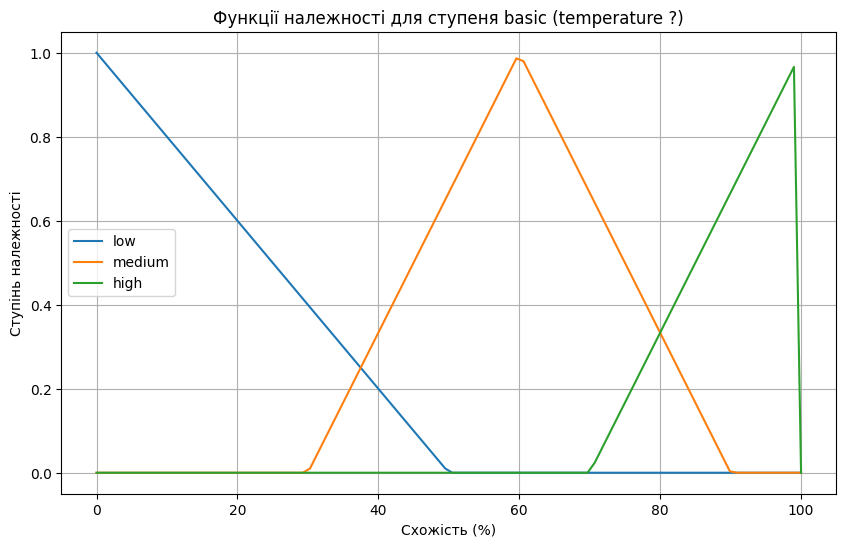

In [185]:
class DeciderPipe:
  def __init__(self, name, deciders_dict: dict[str, SoftDecider], X: np.ndarray = None):
    self.name = name
    self.deciders_dict = deciders_dict
    self.deciders = deciders_dict.values()
    if X is None:
      self.X = np.linspace(0, 100, 100)
    
  def decide(self, x) -> list[float]:
    return [decider.decide(x) for decider in self.deciders]
  def decide_strs(self, str1, str2) -> list[float]:
    return [decider.decide_strs(str1, str2) for decider in self.deciders]
  
  def get_rule_decider(self, rule: str) -> SoftDecider:
    return self.deciders_dict[rule]
  def set_decider_threshold(self, rule: str, threshold: int | float):
    self.deciders_dict[rule].modul.threshold = threshold
  
  def plot(self) -> None:
    plt.figure(figsize=(10, 6))
    for decider in self.deciders:
      plt.plot(self.X, decider.decide_array(X), label=decider.name)
    plt.title(f'Функції належності для ступеня {self.name}')
    plt.xlabel('Схожість (%)')
    plt.ylabel('Ступінь належності')
    plt.legend()
    plt.grid(True)
    plt.show()
    
  def decide_and_plot(self, x) -> list[float]:
    print(''.join([f"{decider.name} : {decider.decide(x):.2f} | " for decider in self.deciders]))
    plt.figure(figsize=(10, 6))
    for decider in self.deciders:
      plt.plot(self.X, decider.decide_array(X), label=decider.name)
    plt.axvline(x=x, color='red', linestyle='--', label=f"X at {x}")
    plt.title(f'Функції належності для ступеня {self.name}')
    plt.xlabel('Схожість (%)')
    plt.ylabel('Ступінь належності')
    plt.legend()
    plt.grid(True)
    plt.show()
    return self.decide(x) 
    
decider = DeciderPipe(
  "basic (temperature ?)", {
    "low": SoftDecider("low", [0, 0, 50]),
    "medium": SoftDecider("medium", [30, 60, 90]),
    "high": SoftDecider("high", [70, 100, 100]),
  }
)
decider.plot()

In [ ]:
decider.decide(40)

[0.2, 0.3333333333333333, 0]

low : 0.20 | medium : 0.33 | high : 0.00 | 


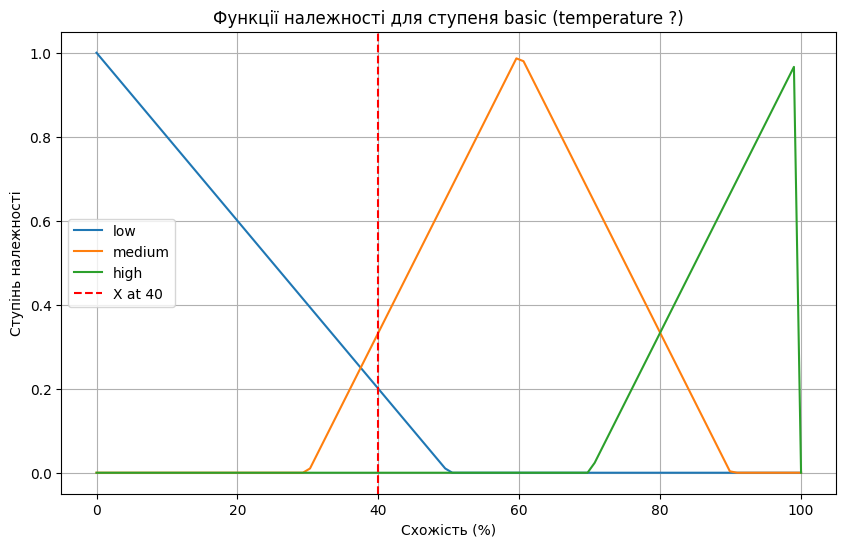

[0.2, 0.3333333333333333, 0]

In [179]:
decider.decide_and_plot(40)

In [186]:
decider.decide_strs("Hello", "Hell no")

[0.16, 0.4, 0]

In [187]:
decider.get_rule_decider("medium").decide_strs("Hello", "Hell no")

0.4

In [188]:
decider.get_rule_decider("medium").decide_strs_hard("Hello", "Hell no")

'Nooo🚬'

In [189]:
decider.set_decider_threshold("medium", 40)
decider.get_rule_decider("medium").modul.threshold

40

In [190]:
decider.get_rule_decider("medium").decide_strs_hard("Hello", "Hell no", strong=True)

'Yess🎀'

# 2. Формування нечітких множин для кожного параметра:
1. Ступінь схожості: низька, середня, висока
2. Довжина терміну: короткий, середній, довгий
3. Фонетична схожість: невідповідна, часткова, повна

але перед тим як робити десайдери, давайте потикаєм різні графіки

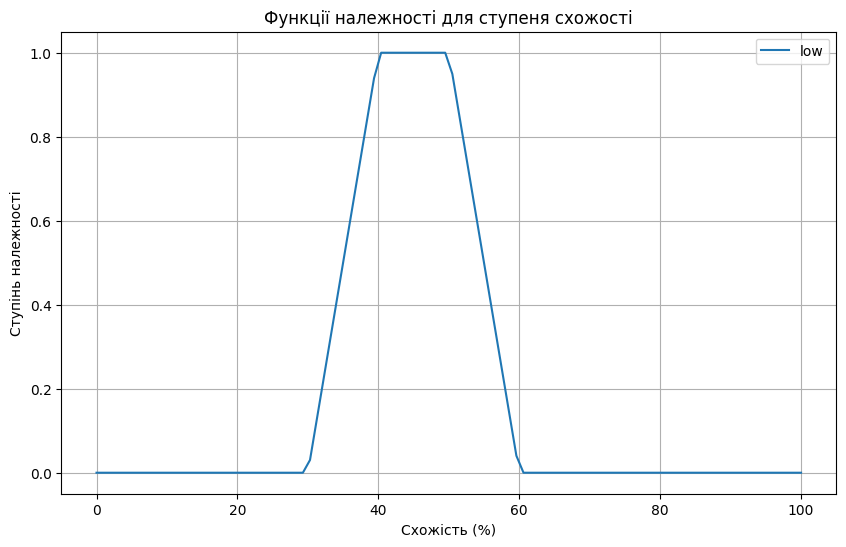

In [191]:
X = np.linspace(0, 100, 100)

# трапезоїда

low_rules = [30, 40, 50, 60]
low_member = membership.apply(X, lambda x: membership.trapezoidal(x, low_rules))
membership.plot(X, low_member, "low")

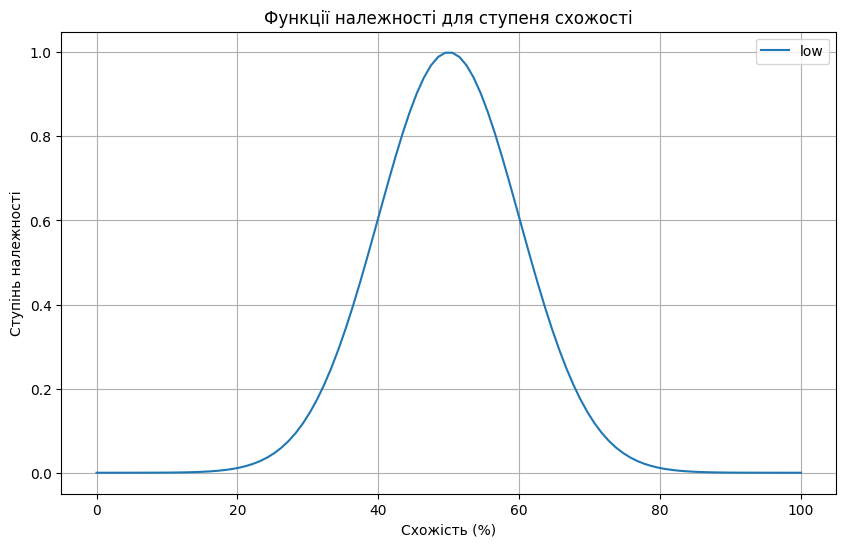

In [35]:
low_rules = [50, 10]
low_member = membership.apply(X, lambda x: membership.gaussian(x, low_rules))
membership.plot(X, low_member, "low")

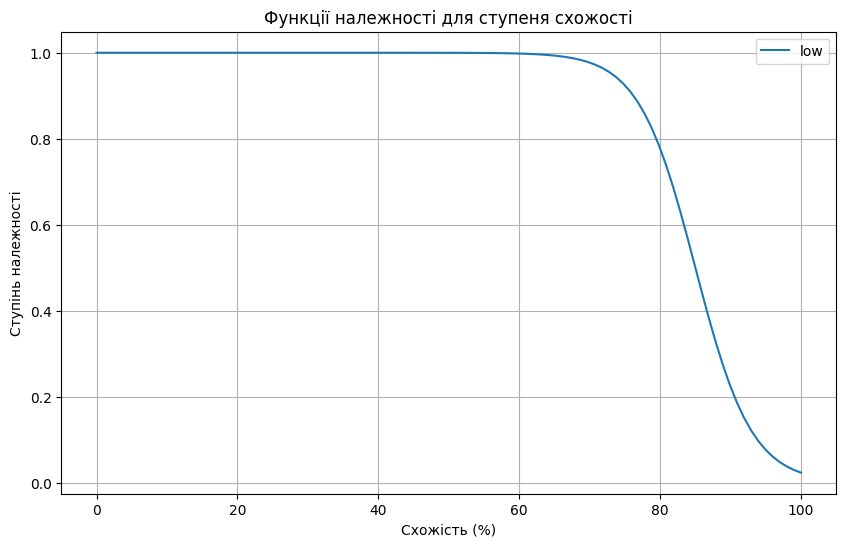

In [192]:
low_rules = [-0.25, 85]
low_member = membership.apply(X, lambda x: membership.sigmoidal(x, low_rules))
membership.plot(X, low_member, "low")

а тепер складаєм наше лєґо

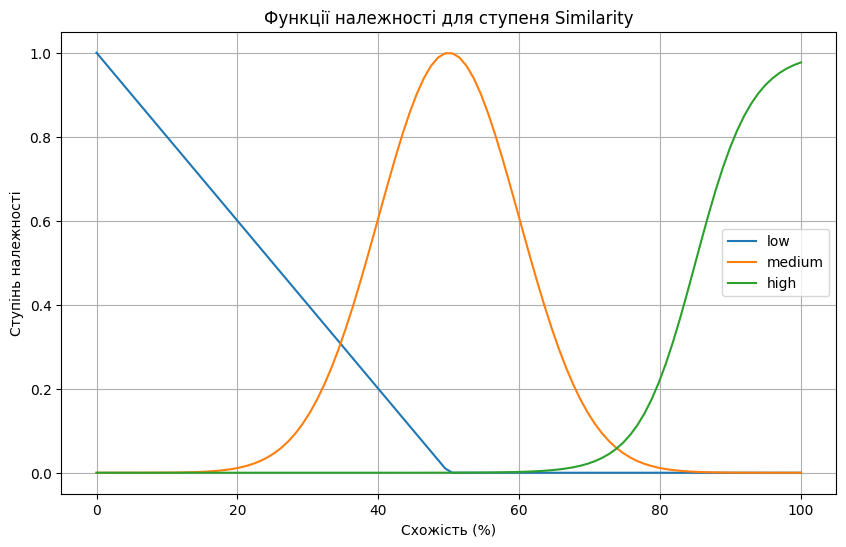

In [193]:
# Ступінь схожості: низька, середня, висока
similarity_decider = DeciderPipe(
  "Similarity", {
    "low": SoftDecider("low", [0, 0, 50], membership_function=MembershipFunctions.triangular),
    "medium": SoftDecider("medium", [50, 10], membership_function=MembershipFunctions.gaussian),
    "high": SoftDecider("high", [0.25, 85], membership_function=MembershipFunctions.sigmoidal),
  }
)
similarity_decider.plot()

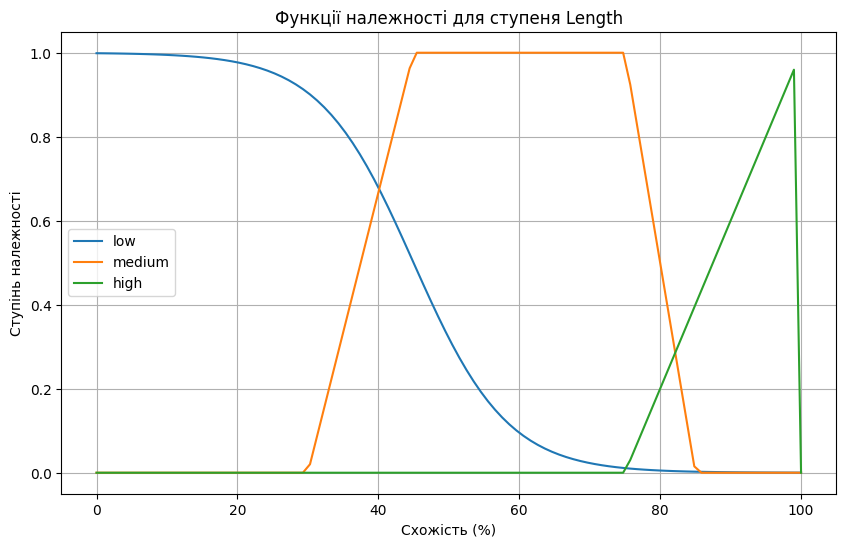

In [194]:
# Довжина терміну: короткий, середній, довгий
length_decider = DeciderPipe(
  "Length", {
    "low": SoftDecider("low", [-0.15, 45], membership_function=MembershipFunctions.sigmoidal),
    "medium": SoftDecider("medium", [30, 45, 75, 85], membership_function=MembershipFunctions.trapezoidal),
    "high": SoftDecider("high", [75, 100, 100], membership_function=MembershipFunctions.triangular),
  }
)
length_decider.plot()

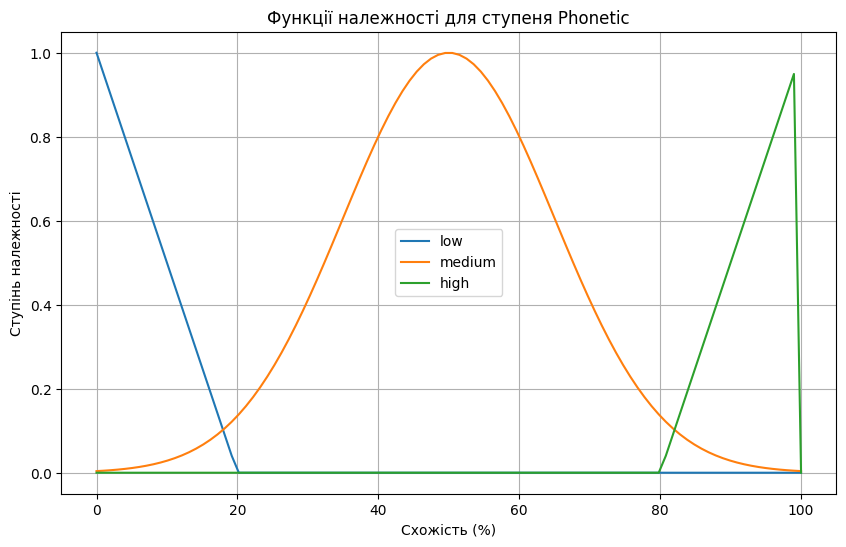

In [195]:
# 3. Фонетична схожість: невідповідна, часткова, повна
phonetic_decider = DeciderPipe(
  "Phonetic", {
    "low": SoftDecider("low", [0, 0, 20], membership_function=MembershipFunctions.triangular),
    "medium": SoftDecider("medium", [50, 15], membership_function=MembershipFunctions.gaussian),
    "high": SoftDecider("high", [80, 100, 100], membership_function=MembershipFunctions.triangular),
  }
)
phonetic_decider.plot()

low : 0.10 | medium : 0.10 | high : 0.00 | 


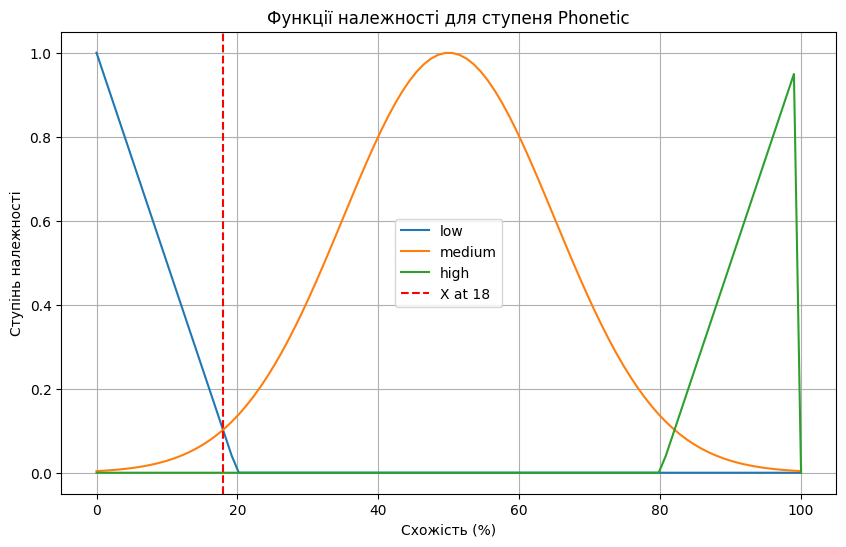

[0.1, 0.10273981490249434, 0]

In [196]:
phonetic_decider.decide_and_plot(18)

In [197]:
phonetic_decider.decide_strs("Hello", "Hell no")

[0, 0.8674284731834108, 0]

а тепер запихнем це всьо в пайп🎁

In [198]:
class Pipeline:
  def __init__(self, decider_pipes: dict[str, DeciderPipe]):
    self.decider_dict = decider_pipes
    self.decider_pipes = decider_pipes.values()
    self.answers = [
      "ващє мімо", "вродь та", "от бігме подібні", "а такого не прописано..."
    ]
    self.threshold = 50
  
  def inquire_but_softly(self, decider, rule, str1, str2) -> float:
    rule_decider = self.decider_dict[decider].get_rule_decider(rule)
    #print(rule_decider.modul.decisions[1])
    return round(rule_decider.decide_strs(str1, str2), 2) * 100
  
  @staticmethod
  def fuzzy_AND(a: float, b: float) -> float:
    return min(a, b)
    
  def decide_fuzzy(self, str1, str2):
    """
    1. Якщо ступінь схожості висока та фонетична схожість повна, то
      терміни належать до однієї групи.
    2. Якщо ступінь схожості середня та довжина термінів коротка, то
      ймовірність належності висока.
    3. Якщо ступінь схожості низька та фонетична схожість 
      невідповідна, то терміни належать до різних груп.
    """
    res_index = None
    
    first_rule = self.fuzzy_AND(self.inquire_but_softly("similarity", "high", str1, str2), self.inquire_but_softly("phonetic", "high", str1, str2))
    second_rule = self.fuzzy_AND(self.inquire_but_softly("similarity", "medium", str1, str2), self.inquire_but_softly("length", "low", str1, str2))
    third_rule = self.fuzzy_AND(self.inquire_but_softly("similarity", "low", str1, str2), self.inquire_but_softly("phonetic", "low", str1, str2))
    result_rule = None
    
    if first_rule > self.threshold:
      print("Якщо ступінь схожості низька та фонетична схожість невідповідна, то терміни належать до різних груп")
      res_index = 2
      result_rule = first_rule
    elif second_rule > self.threshold:
      print("Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока")
      res_index = 1
      result_rule = second_rule
    elif third_rule > self.threshold:
      print("Якщо ступінь схожості висока та фонетична схожість повна, то терміни належать до однієї групи")
      res_index = 0
      result_rule = third_rule
    else:
      res_index = 3
    return self.answers[res_index], result_rule
    
  def decide_float(self, x) -> pd.DataFrame:
    res_dict = {}
    for decider_pipe in self.decider_pipes:
      res_dict[decider_pipe.name] = [round(value, 2) for value in decider_pipe.decide(x)]
    return pd.DataFrame(res_dict).T
  def decide_mapped(self, x: int, map: dict) -> pd.DataFrame:
    return self.decide_float(x).rename(map, axis=1)
  
pipe = Pipeline({
  "similarity": similarity_decider, 
  "length": length_decider, 
  "phonetic": phonetic_decider
})

In [91]:
str1, str2 = "Hello", "Hell no"

In [92]:
pipe.decide_mapped(58, {
  0: "low",
  1: "medium",
  2: "high"
})

,low,medium,high
Similarity,0.00,0.73,0.0
Length,0.12,1.00,0.0
Phonetic,0.00,0.87,0.0


і от тепеееер пригодився той similarity modul, додамо його в soft decider

In [199]:
str1, str2 = "This is a app", "This is not an apple"

In [200]:
pipe.inquire_but_softly("similarity", "medium", str1, str2)

55.00000000000001

In [148]:
pipe.inquire_but_softly("length", "low", str1, str2)

71.0

In [149]:
pipe.inquire_but_softly("phonetic", "medium", str1, str2)

76.0

In [150]:
pipe.decide_fuzzy(str1, str2)

Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока


('вродь та', 55.00000000000001)

In [203]:
ds.head()

,Expedia,Booking.com,jw,damerau_levenshtein,soundex,similarity_weighted,fuzzy_decision
0,"Deluxe Room, 1 King Bed",Deluxe King Room,0.820513,12,0,3.41,"(вродь та, 65.0)"
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible,0.736842,17,100,29.62,"(а такого не прописано..., None)"
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room,0.785714,12,100,28.39,"(а такого не прописано..., None)"
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite,0.558140,20,0,5.28,"(а такого не прописано..., None)"
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room,0.888889,12,100,28.44,"(а такого не прописано..., None)"


In [137]:
pairs = [(str1, str2) for str1, str2 in zip(ds['Expedia'], ds['Booking.com'])]
pairs[:5]

[('Deluxe Room, 1 King Bed', 'Deluxe King Room'),
 ('Standard Room, 1 King Bed, Accessible',
  'Standard King Roll-in Shower Accessible'),
 ('Grand Corner King Room, 1 King Bed', 'Grand Corner King Room'),
 ('Suite, 1 King Bed (Parlor)', 'King Parlor Suite'),
 ('High-Floor Premium Room, 1 King Bed', 'High-Floor Premium King Room')]

In [138]:
ds['jw'] = pd.Series(modul.token_sort_ratio(str1, str2) for str1, str2 in pairs)

In [140]:
ds['damerau_levenshtein'] = pd.Series(modul.damerau_levenshtein_distance(str1, str2) for str1, str2 in pairs)

In [142]:
ds['soundex'] = pd.Series(modul.soundex_similarity(str1, str2) for str1, str2 in pairs)

In [144]:
ds['similarity_weighted'] = pd.Series(
  modul.similarity_weighted_V2(str1, str2, weights = [
    (modul.token_sort_ratio, 0.5),
    (modul.soundex_similarity, 0.25),
    (modul.damerau_levenshtein_distance, 0.25)
  ]) for str1, str2 in pairs)

In [201]:
str1, str2 = pairs[2]
pipe.decide_fuzzy(str1, str2)

('а такого не прописано...', None)

In [202]:
ds['fuzzy_decision'] = pd.Series(
  pipe.decide_fuzzy(str1, str2) for str1, str2 in pairs
)

Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належності висока
Якщо ступінь схожості середня та довжина термінів коротка, то ймовірність належн

In [208]:
ds['fuzzy_decision'].value_counts()

fuzzy_decision
(а такого не прописано..., None)    88
(вродь та, 65.0)                     7
(вродь та, 61.0)                     3
(вродь та, 56.99999999999999)        3
(вродь та, 55.00000000000001)        2
Name: count, dtype: int64